In [1]:
"""
SSD demo 
"""
%matplotlib inline
import random
import time
from pathlib import Path

import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from ssd_model import SSD_model_mobilev1, SSD_model_mobilev1_38,SSD_model_mobilev2, SSD_model_mobilev2_38,\
                      SSD_model_mobilev2_fssd, SSD_model_mobilev2_fpn, SSD_model_vgg

from utils import preprocess_image, process_bboxes, preprocess_label, process_tp
from visualization import plt_bboxes, bboxes_draw_on_img
from read_txt import Read_txt, load_dataset, load_npz, save_dataset2

import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

# Test

model_path = "./mobilev2_ssd_fpn" # mobilev2_fssd mobilev2_ssd mobilev2_ssd_fpn
#handle = SSD_model_mobilev2_fssd(model_path = model_path)
handle = SSD_model_mobilev2_fpn(model_path = model_path)
NUM_TEST = 50

#data_path = Path.cwd().parent / "ssd_data_night"
#targets = Read_txt(str( data_path / "night_frames_gt.txt"), (1280, 670)).read()
data_path = Path.cwd().parent / "ssd_data"
targets = Read_txt(data_path, str( data_path / "all_frames_gt_cla.txt"), (1280, 720)).read()
tar = targets[2048:]
random.shuffle(tar)

def predi(data, i):
    print(data["name"])
    t1 = time.time()
    pred = handle.test({'x':data["img_prepocessed"]})
    #plt_bboxes(data["img_rgb"].astype(np.int), pred["classes"], pred["scores"], pred["bboxes"])    
    img = bboxes_draw_on_img(data["img_rgb"].astype(np.int), pred["classes"], pred["scores"], pred["bboxes"])
    t2 = time.time()
    fig = plt.figure(figsize=(10,10))   
    plt.imshow(img.astype(np.int)[:,:,::-1])
    plt.show()
    #cv2.imwrite(str(Path.cwd() / "output_img")+"/"+str(i).zfill(4)+".jpg", img)
    
    print("\nCost time = ", t2 - t1)

for i, target in enumerate(tar[:NUM_TEST]):
    img = cv2.imread(target["name"])
    if img is None:
        continue

    print("load: ", target["name"])
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_prepocessed = preprocess_image(img_rgb, num=1)
    
    data = {"img_prepocessed": img_prepocessed, "img_rgb": img, "name": target["name"]}
    
    predi(data, i)    
    
    break

model_path = "./SSD_model-mobilev2-32-1"
handle = SSD_model(model_path = model_path)

#data_path = Path.cwd().parent / "ssd_data_night"
#targets = Read_txt(str( data_path / "night_frames_gt.txt"), (1280, 670)).read()
data_path = Path.cwd().parent / "ssd_data"
targets = Read_txt(str( data_path / "all_frames_gt_cla.txt"), (1280, 720)).read()
tar = targets[2048:]
random.shuffle(tar)

def predi(data_list):
    for data in data_list:
        print(data["name"])
        pred = handle.predictor({'x':data["img_prepocessed"]})
        plt_bboxes(data["img_rgb"].astype(np.int), pred["classes"], pred["scores"], pred["bboxes"])
        #rclasses, rscores, rbboxes = process_bboxes(pred["classes"], pred["scores"], pred["bboxes"])
        #plt_bboxes(img_list[i].astype(np.int), rclasses, rscores, rbboxes)

data_list = []
for i, target in enumerate(tar[:20]):
    img = cv2.imread(str(data_path / target["name"]))
    if img is None:
        continue
    #if target["name"] != "18697.jpg":
    #    continue
    print("load: ", target["name"])
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    #bboxes = preprocess_label(target['bbox'], img.shape)
    #labels = target['class']
    img_prepocessed = preprocess_image(img_rgb)
    cropped_image_with_box = img_rgb
    
    '''img_prepocessed, label_prepocessed, \
            box_prepocessed,cropped_image_with_box = process_img(img_rgb, 
                                                                 labels, 
                                                                 bboxes,
                                                                 out_shape=(300,300),
                                                                 min_object_covered=0.3,
                                                                 aspect_ratio_range=(0.5, 2))'''
    
    
    data_list.append({"img_prepocessed": img_prepocessed, "img_rgb": cropped_image_with_box, "name": target["name"]})
    t1 = time.time()
    predi(data_list)    
    t2 = time.time()
    data_list = []
    print("\nCost time = ", t2 - t1)
    #break

t1 = time.time()
#predi()

t2 = time.time()
print("\nCost time = ", t2 - t1)

#break

# Test all

model_path = "./mobilev2-fssd-nostan"
handle = SSD_model(model_path = model_path)
NUM_TEST = 200

#data_path = Path.cwd().parent / "ssd_data_night"
#targets = Read_txt(str( data_path / "night_frames_gt.txt"), (1280, 670)).read()
data_path = Path.cwd().parent / "night_frames2" #ssd_data_night night_frames2 ssd_data
targets = list(data_path.glob('*.jpg'))
#targets.sort()
tar = targets[2024:]

#random.shuffle(tar)

def predi(data, i):
    t1 = time.time()
    
    pred = handle.test({'x':data["img_prepocessed"]})
    #plt_bboxes(data["img_rgb"].astype(np.int), pred["classes"], pred["scores"], pred["bboxes"])
    img = bboxes_draw_on_img(data["img_rgb"].astype(np.int), pred["classes"], pred["scores"], pred["bboxes"])
    
    t2 = time.time()
    fig = plt.figure(figsize=(10,10))
    plt.imshow(img.astype(np.int)[:,:,::-1])
    plt.show()
    print("\nCost time = ", t2 - t1)
    #cv2.imwrite(str(Path.cwd() / "output_img")+"/"+str(i).zfill(4)+".jpg", img)

for i, target in enumerate(tar[:]):
    img = cv2.imread(str(target))
    if img is None:
        continue
    print("load: ", target.name)    
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)   
    img_prepocessed = preprocess_image(img_rgb, num=1)    
    data = {"img_prepocessed": img_prepocessed, "img_rgb": img, "name": str(target.name)}

    predi(data, i)
    #break

# Test saved_nodel

model_path = "./mobilev2_ssd_ratio335075"
handle = SSD_model_mobilev2(model_path = model_path)
handle.save_model("saved_model_ssd_ratio335075")

from tensorflow.contrib import predictor

def get_pred_fn(dir_path):
    export_dir = dir_path
    subdirs = [x for x in Path(export_dir).iterdir()
               if x.is_dir() and 'temp' not in str(x)]
    latest = str(sorted(subdirs)[-1]) # saved_model/1556852589
    return predictor.from_saved_model(latest)

predict_fn = get_pred_fn("saved_model_mobilev2_ssd_width0125_19")
predict_fn2 = get_pred_fn("saved_model_mobilev2_ssd_width0125_38")
#predict_fn3 = get_pred_fn("saved_model_mobilev2_ssd_width0125_38_extra05re")

NUM_TEST = 50

#data_path = Path.cwd().parent / "ssd_data_night"
#targets = Read_txt(str( data_path / "night_frames_gt.txt"), (1280, 670)).read()
data_path = Path.cwd().parent / "night_frames2"
targets = Read_txt(data_path, str( data_path / "night_frames2_gt_cls.txt"), (1280, 720)).read()
#data_path = Path.cwd().parent / "day_frames_update" #ssd_data_night night_frames2 ssd_data day_frames
#targets = list(data_path.glob('*.jpg'))
tar = targets[:]
random.shuffle(tar)

def predi(data, i):
    data2 = data["img_rgb"].copy()
    data3 = data["img_rgb"].copy()
    t1 = time.time()    
    
    pred = predict_fn({'x': data["img_prepocessed"]})
    rclasses, rscores, rbboxes = process_bboxes(tflite=pred["tfoutput"])
    
    img = bboxes_draw_on_img(data["img_rgb"], rclasses, rscores, rbboxes)
    #img = bboxes_draw_on_img(data["img_rgb"], pred["classes"], pred["scores"], pred["bboxes"])
    t2 = time.time()
    print("Cost time = ", t2 - t1)
    
    t1 = time.time()
    
    pred = predict_fn2({'x': data["img_prepocessed"]})
    rclasses, rscores, rbboxes = process_bboxes(tflite=pred["tfoutput"])
    img2 = bboxes_draw_on_img(data2, rclasses, rscores, rbboxes)
    #img2 = bboxes_draw_on_img(data2, pred["classes"], pred["scores"], pred["bboxes"])
    t2 = time.time()
    print("Cost time = ", t2 - t1)
    
    '''
    t1 = time.time()
    
    pred = predict_fn3({'x': data["img_prepocessed"]})
    rclasses, rscores, rbboxes = process_bboxes(tflite=pred["tfoutput"])
    img3 = bboxes_draw_on_img(data3, rclasses, rscores, rbboxes)
    #img3 = bboxes_draw_on_img(data3, pred["classes"], pred["scores"], pred["bboxes"])
    t2 = time.time()
    print("Cost time = ", t2 - t1)
    '''
    
    fig = plt.figure(figsize=(20,20))    
    plt.subplot(1,2,1)
    plt.imshow(img.astype(np.int)[:,:,::-1])
    plt.subplot(1,2,2)
    plt.imshow(img2.astype(np.int)[:,:,::-1])
    #plt.subplot(3,1,3)
    #plt.imshow(img3.astype(np.int)[:,:,::-1])
    plt.show()
    #cv2.imwrite(str(Path.cwd() / "output_img")+"/"+str(i).zfill(4)+".jpg", img)
    

for i, target in enumerate(tar[:NUM_TEST]):
    img = cv2.imread(target["name"])
    #img = cv2.imread(str(target))
    if img is None:
        continue

    print("\nload: ",target["name"]) #target["name"] target.name
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_prepocessed = preprocess_image(img_rgb, num=1)
    
    data = {"img_prepocessed": img_prepocessed, "img_rgb": img}
    
    predi(data, i)
    
    #break

# Get false negative

from tensorflow.contrib import predictor

model_path = "mobilev2_ssd_width0125_38_extra05"

model_name = "saved_model_"+model_path

def get_pred_fn(dir_path):
    export_dir = dir_path
    subdirs = [x for x in Path(export_dir).iterdir()
               if x.is_dir() and 'temp' not in str(x)]
    latest = str(sorted(subdirs)[-1]) # saved_model/1556852589
    return predictor.from_saved_model(latest)

predict_fn = get_pred_fn(model_name)

NUM_TEST = 5989

#data_path = Path.cwd().parent / "ssd_data_night"
#targets = Read_txt(str( data_path / "night_frames_gt.txt"), (1280, 670)).read()
#data_path = Path.cwd().parent / "ssd_data" #ssd_data_night night_frames2 ssd_data day_frames
#targets = list(data_path.glob('*.jpg'))
#data_path = Path.cwd().parent / "day_frames" # ssd_data day_frames
#targets = Read_txt(data_path, str( data_path / "day_frames_gt.txt"), (1280, 720)).read() # all_frames_gt_cla day_frames_gt
'''
dir_path = Path.cwd().parent / "night_frames2"
labels1 = Read_txt(dir_path, str( dir_path / "night_frames2_gt_cls.txt"), (1280, 720)).read() # 1276

dir_path = Path.cwd().parent / "day_frames"
labels2 = Read_txt(dir_path, str( dir_path / "day_frames_gt.txt"), (1280, 720)).read() # 6232

dir_path = Path.cwd().parent / "ssd_data"
labels3 = Read_txt(dir_path, str( dir_path / "all_frames_gt_cla.txt"), (1280, 720)).read() # 2697
'''

dir_path = Path.cwd().parent / "day_frames_update"
labels1 = Read_txt(dir_path, str( dir_path / "day_frames_update_gt.txt"), (1280, 720)).read() # 2501

dir_path = Path.cwd().parent / "day_rain_frames"
labels2 = Read_txt(dir_path, str( dir_path / "day_rain_frames_gt.txt"), (1280, 720)).read() # 1852

dir_path = Path.cwd().parent / "night_frames"
labels3 = Read_txt(dir_path, str( dir_path / "night_frames_gt.txt"), (1280, 720)).read() # 1636

tar = labels1 + labels2 + labels3 # 5989
print(len(tar))

#tar = targets[:]
#random.shuffle(tar)

target_list = []

def show_img(img_bgr, rclasses, rscores, rbboxes):
    img = bboxes_draw_on_img(img_bgr, rclasses, rscores, rbboxes)
    #img = bboxes_draw_on_img(data["img_rgb"], pred["classes"], pred["scores"], pred["bboxes"])
    fig = plt.figure(figsize=(20,20))    
    plt.subplot(1,1,1)
    plt.imshow(img.astype(np.int)[:,:,::-1])
    plt.show()

def predi(data, i):
    global target_list
    t1 = time.time()    
    
    pred = predict_fn({'x': data["img_prepocessed"]})
    rclasses, rscores, rbboxes = process_bboxes(tflite=pred["tfoutput"]) # post process boxes

    tp_list = process_tp(rclasses, rscores, rbboxes, data["class"], data["box"]) # determine true positive    
    if data["box"].shape[0] != tp_list.count(True):
        target_list.append(data["target"])
    
        #show_img(data["img_bgr"], rclasses, rscores, rbboxes)
    
    t2 = time.time()
    print("Cost time = ", t2 - t1)
    
    #cv2.imwrite(str(Path.cwd() / "output_img")+"/"+str(i).zfill(4)+".jpg", img)

for i, target in enumerate(tar[:NUM_TEST]):
    img = cv2.imread(target["name"])
    if img is None:
        continue

    print(i, "load: ",target["name"])
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_prepocessed = preprocess_image(img_rgb, num=1)
    
    labels = np.array(target['class'][0], np.int8) # [1,]
    bboxes = np.array(target['bbox'][0], np.float32) # [1,4]
    
    data = {"img_prepocessed": img_prepocessed, "img_bgr": img, "class": labels, "box": bboxes, "target": target}
    
    predi(data, i)

    #break
print(len(target_list)) # 6083

"""
False negative images to npz file
"""
from read_txt import save_dataset2
dir_path = Path.cwd().parent / "day_frames_update_day_rain_frames_night_frames"
save_path = Path.cwd() / "npz_day_frames_update_day_rain_frames_night_frames"

random.shuffle(target_list)
labels = target_list[:5120] # 
print('labels len= ', len(labels))

src_path = dir_path

t1 = time.time()

save_dataset2(labels, src_path, 32, save_path)


t2 = time.time()
print("\nCost time = ", t2 - t1)

# Precision and recall

In [13]:
from tensorflow.contrib import predictor

model_path = "mobilev2_ssd_width1_19"
model_name = "saved_model_"+model_path

def get_pred_fn(dir_path):
    export_dir = dir_path
    subdirs = [x for x in Path(export_dir).iterdir()
               if x.is_dir() and 'temp' not in str(x)]
    latest = str(sorted(subdirs)[-1]) # saved_model/1556852589
    return predictor.from_saved_model(latest)

predict_fn = get_pred_fn(model_name)

INFO:tensorflow:Restoring parameters from b'saved_model_mobilev2_ssd_width1_19\\1563115181-32000\\variables\\variables'


0 load:  C:\file\M0659416\SVNRepository\night_frames2\000792.jpg
1 load:  C:\file\M0659416\SVNRepository\night_frames2\005610.jpg
2 load:  C:\file\M0659416\SVNRepository\night_frames2\000560.jpg
3 load:  C:\file\M0659416\SVNRepository\night_frames2\002351.jpg
4 load:  C:\file\M0659416\SVNRepository\night_frames2\006053.jpg
5 load:  C:\file\M0659416\SVNRepository\night_frames2\006067.jpg
6 load:  C:\file\M0659416\SVNRepository\night_frames2\000811.jpg
7 load:  C:\file\M0659416\SVNRepository\night_frames2\001132.jpg
8 load:  C:\file\M0659416\SVNRepository\night_frames2\005612.jpg
9 load:  C:\file\M0659416\SVNRepository\night_frames2\001945.jpg
10 load:  C:\file\M0659416\SVNRepository\night_frames2\001134.jpg
11 load:  C:\file\M0659416\SVNRepository\night_frames2\000475.jpg
12 load:  C:\file\M0659416\SVNRepository\night_frames2\001608.jpg
13 load:  C:\file\M0659416\SVNRepository\night_frames2\002599.jpg
14 load:  C:\file\M0659416\SVNRepository\night_frames2\005840.jpg
15 load:  C:\file\M0

127 load:  C:\file\M0659416\SVNRepository\night_frames2\001602.jpg
128 load:  C:\file\M0659416\SVNRepository\night_frames2\003452.jpg
129 load:  C:\file\M0659416\SVNRepository\night_frames2\004655.jpg
130 load:  C:\file\M0659416\SVNRepository\night_frames2\004294.jpg
131 load:  C:\file\M0659416\SVNRepository\night_frames2\005830.jpg
132 load:  C:\file\M0659416\SVNRepository\night_frames2\005592.jpg
133 load:  C:\file\M0659416\SVNRepository\night_frames2\004663.jpg
134 load:  C:\file\M0659416\SVNRepository\night_frames2\003581.jpg
135 load:  C:\file\M0659416\SVNRepository\night_frames2\000800.jpg
136 load:  C:\file\M0659416\SVNRepository\night_frames2\004813.jpg
137 load:  C:\file\M0659416\SVNRepository\night_frames2\001150.jpg
138 load:  C:\file\M0659416\SVNRepository\night_frames2\003259.jpg
139 load:  C:\file\M0659416\SVNRepository\night_frames2\002047.jpg
140 load:  C:\file\M0659416\SVNRepository\night_frames2\003572.jpg
141 load:  C:\file\M0659416\SVNRepository\night_frames2\005832

255 load:  C:\file\M0659416\SVNRepository\night_frames2\005825.jpg
256 load:  C:\file\M0659416\SVNRepository\night_frames2\001461.jpg
257 load:  C:\file\M0659416\SVNRepository\night_frames2\001804.jpg
258 load:  C:\file\M0659416\SVNRepository\night_frames2\001610.jpg
259 load:  C:\file\M0659416\SVNRepository\night_frames2\002788.jpg
260 load:  C:\file\M0659416\SVNRepository\night_frames2\002326.jpg
261 load:  C:\file\M0659416\SVNRepository\night_frames2\003258.jpg
262 load:  C:\file\M0659416\SVNRepository\night_frames2\000572.jpg
263 load:  C:\file\M0659416\SVNRepository\night_frames2\001805.jpg
264 load:  C:\file\M0659416\SVNRepository\night_frames2\003428.jpg
265 load:  C:\file\M0659416\SVNRepository\night_frames2\005038.jpg
266 load:  C:\file\M0659416\SVNRepository\night_frames2\000468.jpg
267 load:  C:\file\M0659416\SVNRepository\night_frames2\002076.jpg
268 load:  C:\file\M0659416\SVNRepository\night_frames2\004657.jpg
269 load:  C:\file\M0659416\SVNRepository\night_frames2\000825

382 load:  C:\file\M0659416\SVNRepository\night_frames2\002056.jpg
383 load:  C:\file\M0659416\SVNRepository\night_frames2\003269.jpg
384 load:  C:\file\M0659416\SVNRepository\night_frames2\003709.jpg
385 load:  C:\file\M0659416\SVNRepository\night_frames2\001162.jpg
386 load:  C:\file\M0659416\SVNRepository\night_frames2\002484.jpg
387 load:  C:\file\M0659416\SVNRepository\night_frames2\005603.jpg
388 load:  C:\file\M0659416\SVNRepository\night_frames2\006080.jpg
389 load:  C:\file\M0659416\SVNRepository\night_frames2\001636.jpg
390 load:  C:\file\M0659416\SVNRepository\night_frames2\006058.jpg
391 load:  C:\file\M0659416\SVNRepository\night_frames2\002966.jpg
392 load:  C:\file\M0659416\SVNRepository\night_frames2\001947.jpg
393 load:  C:\file\M0659416\SVNRepository\night_frames2\001954.jpg
394 load:  C:\file\M0659416\SVNRepository\night_frames2\001459.jpg
395 load:  C:\file\M0659416\SVNRepository\night_frames2\002049.jpg
396 load:  C:\file\M0659416\SVNRepository\night_frames2\001627

507 load:  C:\file\M0659416\SVNRepository\night_frames2\004660.jpg
508 load:  C:\file\M0659416\SVNRepository\night_frames2\003663.jpg
509 load:  C:\file\M0659416\SVNRepository\night_frames2\002954.jpg
510 load:  C:\file\M0659416\SVNRepository\night_frames2\002946.jpg
511 load:  C:\file\M0659416\SVNRepository\night_frames2\002799.jpg
512 load:  C:\file\M0659416\SVNRepository\night_frames2\002332.jpg
513 load:  C:\file\M0659416\SVNRepository\night_frames2\006059.jpg
514 load:  C:\file\M0659416\SVNRepository\night_frames2\003143.jpg
515 load:  C:\file\M0659416\SVNRepository\night_frames2\003661.jpg
516 load:  C:\file\M0659416\SVNRepository\night_frames2\002611.jpg
517 load:  C:\file\M0659416\SVNRepository\night_frames2\002620.jpg
518 load:  C:\file\M0659416\SVNRepository\night_frames2\006074.jpg
519 load:  C:\file\M0659416\SVNRepository\night_frames2\002058.jpg
520 load:  C:\file\M0659416\SVNRepository\night_frames2\001479.jpg
521 load:  C:\file\M0659416\SVNRepository\night_frames2\000525

636 load:  C:\file\M0659416\SVNRepository\night_frames2\002609.jpg
637 load:  C:\file\M0659416\SVNRepository\night_frames2\004644.jpg
638 load:  C:\file\M0659416\SVNRepository\night_frames2\004272.jpg
639 load:  C:\file\M0659416\SVNRepository\night_frames2\003277.jpg
640 load:  C:\file\M0659416\SVNRepository\night_frames2\005834.jpg
641 load:  C:\file\M0659416\SVNRepository\night_frames2\001611.jpg
642 load:  C:\file\M0659416\SVNRepository\night_frames2\000522.jpg
643 load:  C:\file\M0659416\SVNRepository\night_frames2\005827.jpg
644 load:  C:\file\M0659416\SVNRepository\night_frames2\002501.jpg
645 load:  C:\file\M0659416\SVNRepository\night_frames2\002778.jpg
646 load:  C:\file\M0659416\SVNRepository\night_frames2\002608.jpg
647 load:  C:\file\M0659416\SVNRepository\night_frames2\004278.jpg
648 load:  C:\file\M0659416\SVNRepository\night_frames2\002066.jpg
649 load:  C:\file\M0659416\SVNRepository\night_frames2\001637.jpg
650 load:  C:\file\M0659416\SVNRepository\night_frames2\000498

759 load:  C:\file\M0659416\SVNRepository\night_frames2\004662.jpg
760 load:  C:\file\M0659416\SVNRepository\night_frames2\002209.jpg
761 load:  C:\file\M0659416\SVNRepository\night_frames2\003092.jpg
762 load:  C:\file\M0659416\SVNRepository\night_frames2\005619.jpg
763 load:  C:\file\M0659416\SVNRepository\night_frames2\005031.jpg
764 load:  C:\file\M0659416\SVNRepository\night_frames2\000494.jpg
765 load:  C:\file\M0659416\SVNRepository\night_frames2\005030.jpg
766 load:  C:\file\M0659416\SVNRepository\night_frames2\002935.jpg
767 load:  C:\file\M0659416\SVNRepository\night_frames2\003584.jpg
768 load:  C:\file\M0659416\SVNRepository\night_frames2\000562.jpg
769 load:  C:\file\M0659416\SVNRepository\night_frames2\000794.jpg
770 load:  C:\file\M0659416\SVNRepository\night_frames2\005815.jpg
771 load:  C:\file\M0659416\SVNRepository\night_frames2\005627.jpg
772 load:  C:\file\M0659416\SVNRepository\night_frames2\002940.jpg
773 load:  C:\file\M0659416\SVNRepository\night_frames2\000507

888 load:  C:\file\M0659416\SVNRepository\night_frames2\004251.jpg
889 load:  C:\file\M0659416\SVNRepository\night_frames2\000508.jpg
890 load:  C:\file\M0659416\SVNRepository\night_frames2\004801.jpg
891 load:  C:\file\M0659416\SVNRepository\night_frames2\003698.jpg
892 load:  C:\file\M0659416\SVNRepository\night_frames2\001158.jpg
893 load:  C:\file\M0659416\SVNRepository\night_frames2\003711.jpg
894 load:  C:\file\M0659416\SVNRepository\night_frames2\002627.jpg
895 load:  C:\file\M0659416\SVNRepository\night_frames2\004667.jpg
896 load:  C:\file\M0659416\SVNRepository\night_frames2\001928.jpg
897 load:  C:\file\M0659416\SVNRepository\night_frames2\005820.jpg
898 load:  C:\file\M0659416\SVNRepository\night_frames2\004280.jpg
899 load:  C:\file\M0659416\SVNRepository\night_frames2\005027.jpg
900 load:  C:\file\M0659416\SVNRepository\night_frames2\002194.jpg
901 load:  C:\file\M0659416\SVNRepository\night_frames2\006083.jpg
902 load:  C:\file\M0659416\SVNRepository\night_frames2\002570

1014 load:  C:\file\M0659416\SVNRepository\night_frames2\003580.jpg
1015 load:  C:\file\M0659416\SVNRepository\night_frames2\004658.jpg
1016 load:  C:\file\M0659416\SVNRepository\night_frames2\002493.jpg
1017 load:  C:\file\M0659416\SVNRepository\night_frames2\004252.jpg
1018 load:  C:\file\M0659416\SVNRepository\night_frames2\005618.jpg
1019 load:  C:\file\M0659416\SVNRepository\night_frames2\003261.jpg
1020 load:  C:\file\M0659416\SVNRepository\night_frames2\003707.jpg
1021 load:  C:\file\M0659416\SVNRepository\night_frames2\005600.jpg
1022 load:  C:\file\M0659416\SVNRepository\night_frames2\001794.jpg
1023 load:  C:\file\M0659416\SVNRepository\night_frames2\005041.jpg
1024 load:  C:\file\M0659416\SVNRepository\night_frames2\002606.jpg
1025 load:  C:\file\M0659416\SVNRepository\night_frames2\003457.jpg
1026 load:  C:\file\M0659416\SVNRepository\night_frames2\003668.jpg
1027 load:  C:\file\M0659416\SVNRepository\night_frames2\001465.jpg
1028 load:  C:\file\M0659416\SVNRepository\night

1138 load:  C:\file\M0659416\SVNRepository\night_frames2\003288.jpg
1139 load:  C:\file\M0659416\SVNRepository\night_frames2\003567.jpg
1140 load:  C:\file\M0659416\SVNRepository\night_frames2\003568.jpg
1141 load:  C:\file\M0659416\SVNRepository\night_frames2\005824.jpg
1142 load:  C:\file\M0659416\SVNRepository\night_frames2\003558.jpg
1143 load:  C:\file\M0659416\SVNRepository\night_frames2\001632.jpg
1144 load:  C:\file\M0659416\SVNRepository\night_frames2\004648.jpg
1145 load:  C:\file\M0659416\SVNRepository\night_frames2\005589.jpg
1146 load:  C:\file\M0659416\SVNRepository\night_frames2\003095.jpg
1147 load:  C:\file\M0659416\SVNRepository\night_frames2\004666.jpg
1148 load:  C:\file\M0659416\SVNRepository\night_frames2\005037.jpg
1149 load:  C:\file\M0659416\SVNRepository\night_frames2\003696.jpg
1150 load:  C:\file\M0659416\SVNRepository\night_frames2\003571.jpg
1151 load:  C:\file\M0659416\SVNRepository\night_frames2\000484.jpg
1152 load:  C:\file\M0659416\SVNRepository\night

1260 load:  C:\file\M0659416\SVNRepository\night_frames2\004255.jpg
1261 load:  C:\file\M0659416\SVNRepository\night_frames2\002489.jpg
1262 load:  C:\file\M0659416\SVNRepository\night_frames2\001802.jpg
1263 load:  C:\file\M0659416\SVNRepository\night_frames2\000805.jpg
1264 load:  C:\file\M0659416\SVNRepository\night_frames2\004250.jpg
1265 load:  C:\file\M0659416\SVNRepository\night_frames2\006052.jpg
1266 load:  C:\file\M0659416\SVNRepository\night_frames2\003289.jpg
1267 load:  C:\file\M0659416\SVNRepository\night_frames2\001617.jpg
1268 load:  C:\file\M0659416\SVNRepository\night_frames2\001778.jpg
1269 load:  C:\file\M0659416\SVNRepository\night_frames2\001123.jpg
1270 load:  C:\file\M0659416\SVNRepository\night_frames2\001968.jpg
1271 load:  C:\file\M0659416\SVNRepository\night_frames2\002466.jpg
1272 load:  C:\file\M0659416\SVNRepository\night_frames2\002055.jpg
1273 load:  C:\file\M0659416\SVNRepository\night_frames2\000566.jpg
1274 load:  C:\file\M0659416\SVNRepository\night

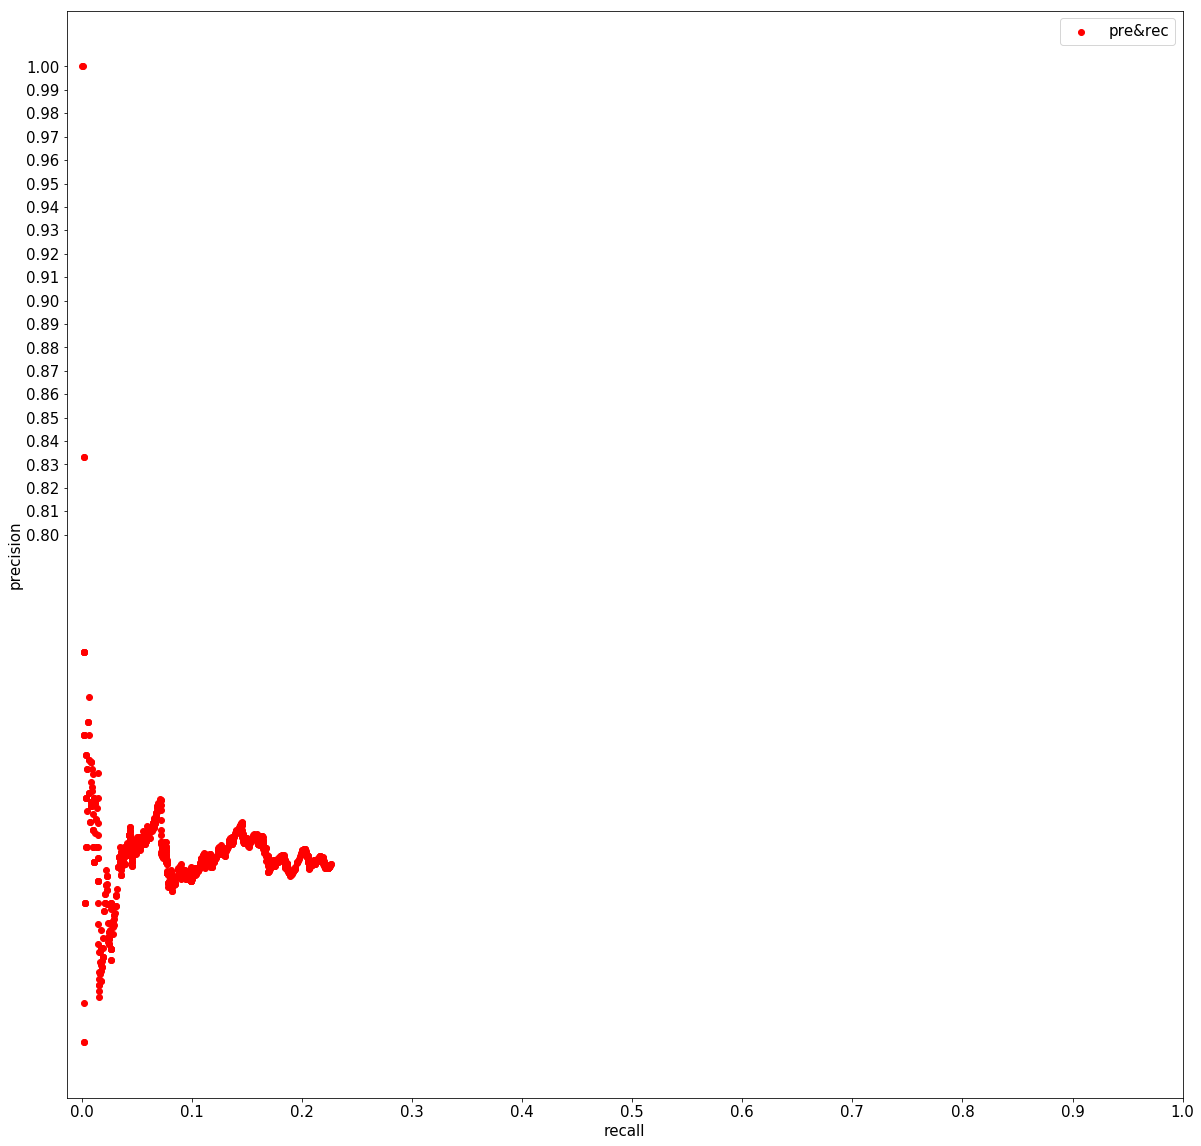

In [14]:
NUM_TEST = 953 # 953 1276

#data_path = Path.cwd().parent / "ssd_data_night"
#targets = Read_txt(str( data_path / "night_frames_gt.txt"), (1280, 670)).read()
#data_path = Path.cwd().parent / "ssd_data" #ssd_data_night night_frames2 ssd_data day_frames
#targets = list(data_path.glob('*.jpg'))
data_path = Path.cwd().parent / "night_frames2" # ssd_data night_frames2
targets = Read_txt(data_path, str( data_path / "night_frames2_gt_cls.txt"), (1280, 720)).read() # ssd_panel_cls night_frames2_gt_cls

tar = targets[:]
'''
dir_path = Path.cwd().parent / "day_frames_update"
labels1 = Read_txt(dir_path, str( dir_path / "day_frames_update_gt.txt"), (1280, 720)).read() # 2501

dir_path = Path.cwd().parent / "day_rain_frames"
labels2 = Read_txt(dir_path, str( dir_path / "day_rain_frames_gt.txt"), (1280, 720)).read() # 1852

dir_path = Path.cwd().parent / "night_frames"
labels3 = Read_txt(dir_path, str( dir_path / "night_frames_gt.txt"), (1280, 720)).read() # 1636

tar = labels1 + labels2 + labels3 # 5989
'''
random.shuffle(tar)

total_gtboxes = 0
total_preboxes = 0
total_tp = 0
precision_list = []
recall_list = []

def draw_precision_recall(precision_list, recall_list):
    fontsize = 15
    fig = plt.figure(figsize=(20,20))
    plt.scatter(recall_list, precision_list, c = "r", label = "pre&rec") # c=color, label=圖示
    new_ticks = np.linspace(0, 1, 11)
    plt.xticks(new_ticks, fontsize=fontsize)
    new_ticks = np.linspace(0.8, 1.0, 21)
    plt.yticks(new_ticks, fontsize=fontsize)
    
    plt.xlabel("recall", fontsize=fontsize) # x轴说明
    plt.ylabel("precision", fontsize=fontsize) # y轴说明
    plt.legend(loc="best", fontsize=fontsize) # 圖示位置
    #plt.title("this is title") # 此图像的标题
    plt.show()
    #fig.savefig(model_name + '.png') # save picture

def predi(data, i):
    global total_gtboxes, total_preboxes, total_tp, precision_list, recall_list
    
    t1 = time.time()    
    
    pred = predict_fn({'x': data["img_prepocessed"]})
    rclasses, rscores, rbboxes = process_bboxes(tflite=pred["tfoutput"]) # post process boxes

    tp_list = process_tp(rclasses, rscores, rbboxes, data["class"], data["box"]) # determine true positive
    
    total_tp = total_tp + tp_list.count(True) # calculate true positive
    total_preboxes = total_preboxes + rclasses.shape[0]
    
    if total_preboxes != 0:
        precision_list.append(total_tp / total_preboxes)
        recall_list.append(total_tp / total_gtboxes)
        #draw_precision_recall(precision_list, recall_list)
    
    '''img = bboxes_draw_on_img(data["img_bgr"], rclasses, rscores, rbboxes)
    #img = bboxes_draw_on_img(data["img_rgb"], pred["classes"], pred["scores"], pred["bboxes"])
    t2 = time.time()
    print("Cost time = ", t2 - t1)
    
    fig = plt.figure(figsize=(20,20))    
    plt.subplot(1,1,1)
    plt.imshow(img.astype(np.int)[:,:,::-1])
    plt.show()
    '''
    #cv2.imwrite(str(Path.cwd() / "output_img")+"/"+str(i).zfill(4)+".jpg", img)

for i, target in enumerate(tar[:]): # NUM_TEST
    img = cv2.imread(target["name"])
    if img is None:
        continue

    total_gtboxes = total_gtboxes + len(target['class'][0])

for i, target in enumerate(tar[:]):
    img = cv2.imread(target["name"])
    if img is None:
        continue

    print(i, "load: ",target["name"])
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_prepocessed = preprocess_image(img_rgb, num=1)
    
    labels = np.array(target['class'][0], np.int8) # [1,]
    bboxes = np.array(target['bbox'][0], np.float32) # [1,4]
    
    data = {"img_prepocessed": img_prepocessed, "img_bgr": img, "class": labels, "box": bboxes}
    
    predi(data, i)
    
    #break

print("total_gtboxes=", total_gtboxes)
print("precision=", precision_list[-1])
print("recall=", recall_list[-1])
draw_precision_recall(precision_list, recall_list)

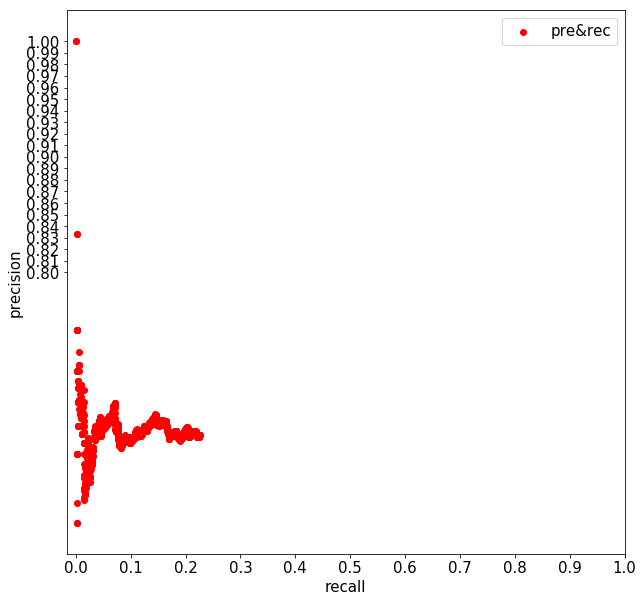

precision= 0.6593090211132437
recall= 0.2261356155365372
total_gtboxes= 3038


In [15]:
def draw_precision_recall(precision_list, recall_list):
    fontsize = 15
    fig = plt.figure(figsize=(10,10))
    plt.scatter(recall_list, precision_list, c = "r", label = "pre&rec") # c=color, label=圖示
    new_ticks = np.linspace(0, 1, 11)
    plt.xticks(new_ticks, fontsize=fontsize)
    new_ticks = np.linspace(0.8, 1.0, 21)
    plt.yticks(new_ticks, fontsize=fontsize)
    
    plt.xlabel("recall", fontsize=fontsize) # x轴说明
    plt.ylabel("precision", fontsize=fontsize) # y轴说明
    plt.legend(loc="best", fontsize=fontsize) # 圖示位置
    #plt.title("this is title") # 此图像的标题
    plt.show()
    #fig.savefig(model_name + '.png') # save picture
    
draw_precision_recall(precision_list, recall_list)
print("precision=", precision_list[-1])
print("recall=", recall_list[-1])
print("total_gtboxes=", total_gtboxes)

# Train npz

In [ ]:
MODEL_PATH = "./mobilev2_ssd_width0125_38" # mobilev1_ssd_width1_19 mobilev2_ssd_width1_19 vgg_ssd_width1
Batch_SIZE = 32
TRAIN_STEP = 32000
NUM_FILE = 160

# SSD_model_mobilev1, SSD_model_mobilev1_38,SSD_model_mobilev2, SSD_model_mobilev2_38 SSD_model_vgg
handle = SSD_model_mobilev2_38(model_path = MODEL_PATH)

In [ ]:
#MODEL_PATH = "./mobilev1_ssd_width1_38" # mobilev1_ssd_width025 mobilev2_ssd_width025 vgg_ssd_width1
#Batch_SIZE = 32
#TRAIN_STEP = 16000
#NUM_FILE = 160

def train(handle, dataset):
    data = {"img": dataset["image"], 
            "class": dataset["class"], 
            "bbox": dataset["bbox"],
            "batch": Batch_SIZE}
    
    handle.train(data=data, step=TRAIN_STEP)

    #print(data["class"])
    #print(data["bbox"])
    
for l in range(1,2):# npz_day_night_nostan npz_ssd_data_day_frames_night_frames2
    dataset = load_dataset((Path.cwd() / "npz_day_frames_update_day_rain_frames_night_frames"), l*NUM_FILE, (l+1)*NUM_FILE) 

In [ ]:
t1 = time.time()

# SSD_model_mobilev1, SSD_model_mobilev1_38,SSD_model_mobilev2, SSD_model_mobilev2_38
#handle = SSD_model_mobilev1_38(model_path = MODEL_PATH) # SSD_model_mobilev1 SSD_model_mobilev2 SSD_model_vgg
train(handle, dataset)

'''
for i, img in enumerate(dataset["image"][:500]):
    print(dataset["bbox"][i])
    scores = [1]*dataset["bbox"][i].shape[0]

    img = bboxes_draw_on_img(img, dataset["class"][i], scores, dataset["bbox"][i])
    fig = plt.figure(figsize=(10,10))   
    plt.imshow(img.astype(np.int))
    plt.show()
'''

t2 = time.time()
print("\nCost time = ", t2 - t1)

# export savemodel

In [ ]:
model_path = MODEL_PATH.split("/")[1] # "mobilev1_ssd_width05_19"
# SSD_model_mobilev1, SSD_model_mobilev1_38,SSD_model_mobilev2, SSD_model_mobilev2_38
#handle = SSD_model_mobilev1(model_path = "./"+model_path) # SSD_model_mobilev1 SSD_model_mobilev2
handle.save_model("saved_model_" + model_path)

# Train

model_path = "./SSD_model-mobilev2-32-100"
Batch_SIZE = 32
TRAIN_STEP = 50

data_path = Path.cwd().parent / "ssd_data"
targets = Read_txt(str( data_path / "all_frames_gt_cla.txt"), (1280, 720)).read()
tar = targets[:2048]

random.shuffle(tar)

t1 = time.time()

img_list = []
label_list = []
box_list = []
#model_hd = SSD_model(model_path = model_path)

def train():
    global img_list
    global label_list
    global box_list
    global a
    
    data = {"img": np.concatenate(img_list), 
            "class": np.concatenate(label_list), 
            "bbox": np.concatenate(box_list),
            "batch": Batch_SIZE}

    #print(data["class"])
    #print(data["bbox"])

    model_hd.train(data=data, step=TRAIN_STEP)
    data = {}
    img_list = []
    label_list = []
    box_list = []

for l in range(100):
    for idx, target in enumerate(tar):
        img = cv2.imread(str(data_path / target["name"]))
        if img is None:
            continue
        print("load: ", target["name"])    
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        #bboxes = preprocess_label(target['bbox'], img.shape)
        bboxes = np.array(target['bbox'], np.float32)
        labels = target['class']

        num = random.randint(1,2)
        
        tf.reset_default_graph() # 
        if num == 1:
            img_prepocessed = preprocess_image(img_rgb)
            label_prepocessed = np.array(labels, np.int64)
            box_prepocessed = np.array(bboxes)

        else:
            img_prepocessed, label_prepocessed, \
                box_prepocessed,cropped_image_with_box = process_img(img_rgb, 
                                                                     labels, 
                                                                     bboxes,
                                                                     out_shape=(300,300),
                                                                     min_object_covered=0.1,
                                                                     aspect_ratio_range=(0.5, 2))
            
        tf.get_default_graph().finalize() #
        
        if label_prepocessed.shape[1] < 4:
            label_prepocessed = label_prepocessed.tolist()
            box_prepocessed = box_prepocessed.tolist()
            for i in range(4-len(label_prepocessed[0])):            
                label_prepocessed[0].append(0)
                box_prepocessed[0].append([0,0,0,0])

        label_prepocessed = np.asarray(label_prepocessed, np.int64)
        box_prepocessed = np.asarray(box_prepocessed, np.float32)

        if label_prepocessed.size == 0:
            continue

        #print("box_prepocessed= ",(box_prepocessed))
        #print("label_prepocessed= ",(label_prepocessed))

        '''
        fig = plt.figure(figsize=(20,20))
        plt.subplot(1,1,1)
        plt.imshow(img_prepocessed[0]) # 顯示圖片
        #plt.subplot(1,2,2)
        #plt.imshow(cropped_image_with_box.astype(np.int)) # 顯示圖片
        plt.show() 
        '''

        # Single
        #data = {"img": img_prepocessed, "class": label_prepocessed, "bbox": box_prepocessed}
        #SSD_model(model_path = model_path).train(data = data)    
        #break

        # Batch
        img_list.append(img_prepocessed)
        label_list.append(label_prepocessed)
        box_list.append(box_prepocessed)

        print("idx+1=",idx+1)

        #if (idx+1) % Batch_SIZE == 0:
        #    train()
            #break

t2 = time.time()
print("\nCost time = ", t2 - t1)

# Show npz data

NUM_FILE = 1

for l in range(1): # npz_day_night_nostan npz_ssd_data_day_frames_night_frames2
    dataset = load_dataset((Path.cwd() / "npz_day_frames_update_day_rain_frames_night_frames"), l*NUM_FILE, (l+1)*NUM_FILE) 

NUM_SHOW = 200
for i, img in enumerate(dataset["image"][:NUM_SHOW]):
    print(dataset["bbox"][i])
    scores = [1]*dataset["bbox"][i].shape[0]

    img = bboxes_draw_on_img(img, dataset["class"][i], scores, dataset["bbox"][i])
    #fig = plt.figure(figsize=(10,10))   
    plt.imshow(img.astype(np.int))
    plt.show()

# Show folder image

NUM_TEST = 200

#data_path = Path.cwd().parent / "ssd_data_night"
#targets = Read_txt(str( data_path / "night_frames_gt.txt"), (1280, 670)).read()
#data_path = Path.cwd().parent / "ssd_data" #ssd_data_night night_frames2 ssd_data day_frames
#targets = list(data_path.glob('*.jpg'))
data_path = Path.cwd().parent / "day_frames" # ssd_data day_frames
targets = Read_txt(data_path, str( data_path / "day_frames_gt.txt"), (1280, 720)).read() # all_frames_gt_cla day_frames_gt

tar = targets[:]
#random.shuffle(tar)
    
def show_img(data):
    img = data["img_prepocessed"][0][:,:,::-1] #data["img_prepocessed"][0][:,:,::-1] data["img_bgr"]
    img_h = img.shape[0]
    img_w = img.shape[1]
    
    for i, box in enumerate(data["box"]):
        print(i, "box w=", (box[3]-box[1])*img_w, "h=", (box[2]-box[0])*img_h)
        
        
    
    #fig = plt.figure(figsize=(20,20))    
    plt.subplot(1,1,1)
    plt.imshow(img.astype(np.int)[:,:,::-1])
    plt.show()
    
    #cv2.imwrite(str(Path.cwd() / "output_img")+"/"+str(i).zfill(4)+".jpg", img)

for i, target in enumerate(tar[:NUM_TEST]):
    img = cv2.imread(target["name"])
    if img is None:
        continue

    total_gtboxes = total_gtboxes + len(target['class'][0])

for i, target in enumerate(tar[:NUM_TEST]):
    img = cv2.imread(target["name"])
    if img is None:
        continue

    print(i, "load: ",target["name"])
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_prepocessed = preprocess_image(img_rgb, num=1)
    
    labels = np.array(target['class'][0], np.int8) # [1,]
    bboxes = np.array(target['bbox'][0], np.float32) # [1,4]
    
    data = {"img_prepocessed": img_prepocessed, "img_bgr": img, "class": labels, "box": bboxes}
    
    show_img(data)
    
    #break